## Historical Data about the olympics
This dataset is about the olympics from 1896 to 2016. The data is in csv format and the data is downloaded from 
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [554]:
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
#--------------------------------------------#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# option for pandas to display the columns
pd.options.display.max_columns=30

# setting the notebook mode for plotly

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# setting theme in cufflinks

cf.set_config_file(theme="pearl")


In [555]:
data = pd.read_csv('athlete_events.csv')

## Data Description

The data consists of :
- ID: unique value for each row
- Name: Names of the participant
- Sex: Male or Female
- Age: Age of the participant
- Height: Height of the participant
- Weight: Weight of the participant
- Team: Team they played for
- NOC: National Olympic Committee 3-letter code
- Games: Year and season
- Year: Integer
- Season: Summer or Winter
- City:Host city
- Sport: Sport
- Event: Event
- Medal: Gold, Silver, Bronze, or NA


In [556]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### First few data of the dataframe

In [558]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Statistical Info

In [559]:
print ( "The oldest player to take part in olympics 2018 is : \n")
print(data.iloc[data['Age'].idxmax()])

The oldest player to take part in olympics 2018 is : 

ID                                             128719
Name                           John Quincy Adams Ward
Sex                                                 M
Age                                                97
Height                                            NaN
Weight                                            NaN
Team                                    United States
NOC                                               USA
Games                                     1928 Summer
Year                                             1928
Season                                         Summer
City                                        Amsterdam
Sport                                Art Competitions
Event     Art Competitions Mixed Sculpturing, Statues
Medal                                             NaN
Name: 257054, dtype: object


In [560]:
print ( "The oldest player to take part in olympics 2018 is : \n")
print(data.iloc[data['Age'].idxmin()])

The oldest player to take part in olympics 2018 is : 

ID                                        71691
Name                         Dimitrios Loundras
Sex                                           M
Age                                          10
Height                                      NaN
Weight                                      NaN
Team              Ethnikos Gymnastikos Syllogos
NOC                                         GRE
Games                               1896 Summer
Year                                       1896
Season                                   Summer
City                                     Athina
Sport                                Gymnastics
Event     Gymnastics Men's Parallel Bars, Teams
Medal                                    Bronze
Name: 142882, dtype: object


In [561]:
print("The average age of the player : \n" )
print (data['Age'].mean())

The average age of the player : 

25.556898357297374


In [562]:
print("Top 5 countries with highest participants \n")
data['Team'].value_counts()[:5].sort_values(ascending=False)

Top 5 countries with highest participants 



United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: Team, dtype: int64

In [563]:
data_medal=data.groupby('Medal')['NOC'].value_counts()

In [564]:
#data.head()

In [565]:
data_meda_1 = pd.DataFrame(data.groupby(['Medal','NOC']).Medal.count())

In [566]:
a=data_meda_1.unstack()

In [567]:
a = a.T

#### pandas styling 

In [568]:
import seaborn as sns
cm = sns.light_palette("yellow", as_cmap=True)

s = a.style.background_gradient(cmap=cm,axis=0).highlight_null('#d65f5f').highlight_max()
s

C:\Users\swos\AppData\Roaming\Python\Python37\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less



## Number of Athletes

In [569]:
data1 = data.groupby(['Year','City'])['Season'].value_counts()

In [570]:
data2 = pd.DataFrame(data={'Athlets': data1.values}, index = data1.index).reset_index()

In [571]:
data2.head()

,Year,City,Season,Athlets
0,1896,Athina,Summer,380
1,1900,Paris,Summer,1936
2,1904,St. Louis,Summer,1301
3,1906,Athina,Summer,1733
4,1908,London,Summer,3101


In [572]:
fig  =  go.Figure()

fig.add_trace(go.Scatter(x=data2['Year'], y = data2['Athlets'], mode='markers'))
fig.update_layout(dict(title='Number of Athltes per year', xaxis=dict(title='Year'), yaxis=dict(title='Number of athletes')))
fig.show()

From the plot above we can see that the number of athletes have gradually increased with years and since there are summer and winter olympics and winter olympics have comparatively less number of participants so there seems to be two lines of data.

In [573]:
data_summer = data2[data2['Season']== 'Summer']
data_winter = data2[data2['Season'] == 'Winter']

In [574]:
fig  =  go.Figure()
fig.add_trace(go.Scatter(x=data_summer['Year'], y = data_summer['Athlets'], mode='markers + lines', name='Summer '))
fig.add_trace(go.Scatter(x=data_winter['Year'], y = data_winter['Athlets'], mode='markers + lines', name='Winter'))
fig.update_layout(dict(title='Number of Athltes per year', xaxis=dict(title='Year'), yaxis=dict(title='Number of athletes')))
fig.show()

From this plot we can see that summer olympic games started earlier than the winter games and the number of players participating in the winter games are fewer than summer, except for 1956 summer olympics which had significantly less participant.

In [575]:
data_summer[data_summer['Year']==1956]

,Year,City,Season,Athlets
20,1956,Melbourne,Summer,4829
21,1956,Stockholm,Summer,298


So, summer olympics in 1956 was held two times, one in Melbourne, Australia and another in Stockholm, Sweden. According to a source in google, many countries boycotted the Melbourne olympics as it was too far and it was the first olympics to be held in the southern hemisphere.

## Number of events per olympic games

In [576]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [577]:
data1 = data.groupby(['Year','Season'])['Sport'].nunique()

In [578]:
data_sport = pd.DataFrame(data={'Sports': data1.values}, index=data1.index)

In [579]:
data_sport.reset_index(inplace=True)

In [580]:
#data_sport.head()

In [581]:
data_sport_summer = data_sport[data_sport['Season'] == 'Summer']
data_sport_winter = data_sport[data_sport['Season'] == 'Winter']


In [582]:
fig  =  go.Figure()
fig.add_trace(go.Bar(x=data_sport_summer['Year'], y = data_sport_summer['Sports'], name='Summer '))
fig.add_trace(go.Bar(x=data_sport_winter['Year'], y = data_sport_winter['Sports'], name='Winter'))
fig.update_layout(dict(title='Number of Sports Per Olypimc', xaxis=dict(title='Year'), yaxis=dict(title='Number of Sport')))
fig.show()

In [583]:
data[data['Year']==2016]['Sport'].nunique()

34

## Average Age of Athletes

In [584]:
data_average_age = data.pivot_table(index='Year',columns='Season', values='Age')

In [585]:
data_average_age.reset_index(inplace=True)

In [586]:
data_average_age.head()

Season,Year,Summer,Winter
0,1896,23.580645,NaN
1,1900,29.034031,NaN
2,1904,26.698150,NaN
3,1906,27.125253,NaN
4,1908,26.970228,NaN


In [587]:
fig  =  go.Figure()
fig.add_trace(go.Bar(x=data_average_age['Year'], y = data_average_age['Summer'], name='Summer '))
fig.add_trace(go.Bar(x=data_average_age['Year'], y = data_average_age['Winter'], name='Winter '))

fig.update_layout(dict(title='Average Age of Athletes', xaxis=dict(title='Year'), yaxis=dict(title='Age')))
fig.show()

## Female and Male participation according to the games

In [588]:
data_1= data.groupby(['Sport'])['Sex'].value_counts()
data_sex1 = pd.DataFrame(data={'Sex_count': data_1.values}, index=data_1.index)
data_sex1.reset_index(inplace=True)
data_sex1_pivot = pd.pivot_table(data_sex1, columns='Sex', index='Sport', values='Sex_count')
data_sex1_pivot.reset_index(inplace = True)
data_sex1_pivot.fillna(0,inplace=True)
data_sex1_pivot.head()

Sex,Sport,F,M
0,Aeronautics,0.0,1.0
1,Alpine Skiing,3398.0,5431.0
2,Alpinism,1.0,24.0
3,Archery,1015.0,1319.0
4,Art Competitions,377.0,3201.0


In [589]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = data_sex1_pivot['Sport'],
    y = data_sex1_pivot['F'],
    name='Female',
    marker_color='#ff0000'
))
fig.add_trace(go.Bar(
    x = data_sex1_pivot['Sport'],
    y = data_sex1_pivot['M'],
    name='Male',
    marker_color='lightsalmon'
))

fig.update_layout(title_text='Female vs Male in different sports',barmode='stack', xaxis_tickfont_size=9,
                 )
fig.show()

## Medals

In [590]:
data4 = data.groupby(['NOC'])['Medal'].value_counts()

In [591]:
#data4.head()

In [592]:
data_medal = pd.DataFrame(data={'Medals': data4.values}, index=data4.index)

In [593]:
#data_medal.head()

In [594]:
data_medal=data_medal.unstack()

In [595]:
#data_medal.head()

In [596]:
data_medal.reset_index(inplace=True)

In [597]:
#data_medal.head()

In [598]:
data_medal.columns = data_medal.columns.get_level_values(1)

In [599]:
data_medal.rename(columns = {'':'NOC'}, inplace = True) 

In [600]:
#data_medal.head()

In [601]:
fig  =  go.Figure()
fig.add_trace(go.Bar(x=data_medal['NOC'], y = data_medal['Bronze'], name='Bronze ', marker_color = 'lightgoldenrodyellow'))
fig.add_trace(go.Bar(x=data_medal['NOC'], y = data_medal['Silver'], name='Silver ', marker_color='silver'))
fig.add_trace(go.Bar(x=data_medal['NOC'], y = data_medal['Gold'], name='Gold ', marker_color='gold'))
fig.update_layout(dict(barmode='relative'),dict(title='Medals per country', xaxis=dict(title='Countries'), yaxis=dict(title='Number of Medals')))
fig.show()


From the chat above we can see that the USA have dominated the olympic medals. They have the highest number of golds(2638), silver(1641) and bronze (1358) among all the countries for the olympics since the start.

In [602]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Latest Olympic

In [603]:
data_latest = data[data['Year']==2016]

In [604]:
#data_latest = ff.create_table(data_latest)

In [605]:
data_latest.reset_index(inplace=True)

In [606]:
data_latest.drop(columns='index')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
1,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
2,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
3,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
4,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
5,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,NaN
6,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
7,55,Antonio Abadia Beci,M,26.0,170.0,65.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",NaN
8,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
9,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze


In [607]:
data_latest.isnull().sum()

index         0
ID            0
Name          0
Sex           0
Age           0
Height      176
Weight      223
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     11665
dtype: int64

### Female and Male

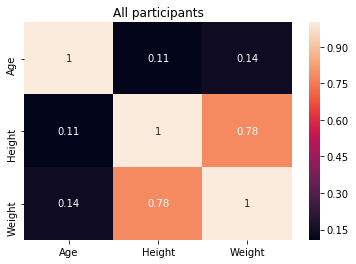

In [608]:
sns.heatmap(data_latest.loc[:,['Age','Height','Weight']].corr(), annot=True)
plt.title('All participants')
plt.show()

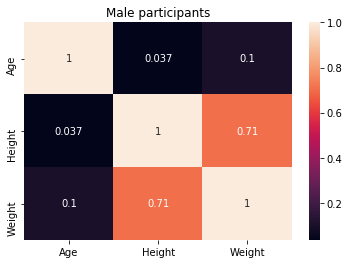

In [609]:
sns.heatmap(data_latest[data_latest['Sex']== 'M'][['Age','Height','Weight']].corr(), annot=True)
plt.title('Male participants')
plt.show()

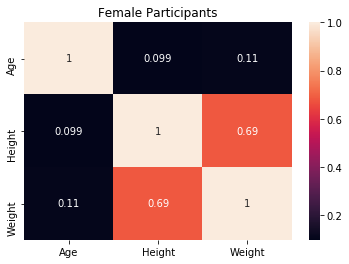

In [610]:
sns.heatmap(data_latest[data_latest['Sex']== 'F'][['Age','Height','Weight']].corr(), annot=True)
plt.title('Female Participants')
plt.show()

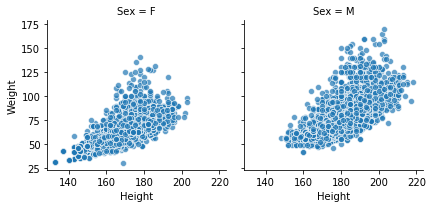

In [611]:
g = sns.FacetGrid(data_latest, col="Sex")
g.map(sns.scatterplot, "Height", "Weight", alpha=.7)
g.add_legend()

plt.show()

From all the plots, we can see that height and weight are correlated with each other which is very easy to understand. The 
scatter plot explains that the average height of the men is more than the average height of female so we need to keep this in mind
when we are filling the nan value in height and weight

In [612]:
data_latest.describe()

,index,ID,Age,Height,Weight,Year
count,13688.000000,13688.000000,13688.000000,13512.000000,13465.000000,13688.0
mean,135366.955289,68145.304135,26.207919,176.034266,70.988637,2016.0
std,79683.915472,39735.448448,5.560367,11.440259,15.715083,0.0
min,80.000000,22.000000,13.000000,133.000000,30.000000,2016.0
25%,64650.750000,33079.000000,22.000000,168.000000,60.000000,2016.0
50%,138031.500000,69360.000000,26.000000,175.000000,69.000000,2016.0
75%,203569.250000,102201.000000,29.000000,184.000000,80.000000,2016.0
max,271110.000000,135568.000000,62.000000,218.000000,170.000000,2016.0


In [613]:
data_latest.head()

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
1,139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
2,140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
3,141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
4,142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


In [614]:
height_mean_male = data_latest['Height'].where(data_latest['Sex']=='M').mean()
height_mean_female = data_latest['Height'].where(data_latest['Sex']=='M').mean()
weight_mean_male = data_latest['Weight'].where(data_latest['Sex']=='M').mean()
weight_mean_female = data_latest['Weight'].where(data_latest['Sex']=='F').mean()

In [615]:
dl=data_latest.copy()

In [632]:
data_latest.loc[(data_latest['Sex']=='M') & (np.isnan(data_latest['Height'])),'Height']= height_mean_male
data_latest.loc[(data_latest['Sex']=='M') & (np.isnan(data_latest['Weight'])),'Weight']= weight_mean_male
data_latest.loc[(data_latest['Sex']=='F') & (np.isnan(data_latest['Height'])),'Height']= height_mean_female
data_latest.loc[(data_latest['Sex']=='F') & (np.isnan(data_latest['Weight'])),'Weight']= weight_mean_female

In [633]:
data_latest.isnull().sum()

index         0
ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     11665
dtype: int64

In [618]:
data_latest['Team'].unique()

array(['Romania', 'Spain', 'Italy', 'Azerbaijan', 'France', 'Algeria',
       'Bahrain', 'Netherlands', 'Iraq', 'Ireland', 'United States',
       'Egypt', 'Iran', 'Belgium', 'Cameroon', 'Kazakhstan', 'Brunei',
       'Uzbekistan', 'Tajikistan', 'Russia', 'Canada', 'Germany',
       'Mexico', 'Ethiopia', 'Sri Lanka', 'Armenia', 'Kenya', 'Nigeria',
       'Brazil', 'Australia', 'Chile', 'Switzerland', 'Belarus', 'Guyana',
       'Georgia', 'Portugal', 'Colombia', 'Djibouti', 'Jordan',
       'Palestine', 'Saudi Arabia', 'India', 'Ghana', 'Honduras',
       'El Salvador', 'Venezuela', 'Argentina', 'Turkmenistan', 'Japan',
       'Saint Kitts and Nevis', 'Great Britain', 'New Zealand', 'Turkey',
       'Eritrea', 'Uganda', 'Mongolia', 'Lithuania', 'Namibia',
       'Kyrgyzstan', 'Puerto Rico', 'Malaysia', 'Samoa', 'Angola',
       'South Africa', 'Greece', 'Norway', 'Cuba', 'Paraguay',
       'Indonesia', 'Indonesia-1', 'Bangladesh', "Cote d'Ivoire",
       'Trinidad and Tobago', 'China',

In [619]:
data_latest['Team'] = data_latest['Team'].str.split('-').str.get(0)

In [620]:
print ( "The oldest player to take part in olympics 2018 is : \n")
print(data_latest.iloc[data_latest['Age'].idxmax()])

The oldest player to take part in olympics 2018 is : 

index                                        29912
ID                                           15436
Name                                Julie Brougham
Sex                                              F
Age                                             62
Height                                         157
Weight                                          48
Team                                   New Zealand
NOC                                            NZL
Games                                  2016 Summer
Year                                          2016
Season                                      Summer
City                                Rio de Janeiro
Sport                                Equestrianism
Event     Equestrianism Mixed Dressage, Individual
Medal                                          NaN
Name: 1612, dtype: object


In [621]:
print ( "The youngest player to take part in olympics 2018 is : \n")
print(data_latest.iloc[data_latest['Age'].idxmin()])

The youngest player to take part in olympics 2018 is : 

index                                     49377
ID                                        25434
Name                            Ana Iulia Dascl
Sex                                           F
Age                                          13
Height                                      183
Weight                                       60
Team                                    Romania
NOC                                         ROU
Games                               2016 Summer
Year                                       2016
Season                                   Summer
City                             Rio de Janeiro
Sport                                  Swimming
Event     Swimming Women's 100 metres Freestyle
Medal                                       NaN
Name: 2662, dtype: object


In [622]:
import plotly.express as px
fig = px.box(data_latest, x="Age", color="Sex",
             notched=True, # used notched shape
             title="Box plot of Age of Male and Female",
             hover_data=["Name"]
            )
fig.show()

#### Games

In [623]:
data_latest_1= data_latest.groupby(['Sport'])['Sex'].value_counts()

In [624]:
data_sex = pd.DataFrame(data={'Sex_count': data_latest_1.values}, index=data_latest_1.index)

In [625]:
data_sex.reset_index(inplace=True)

In [626]:
data_sex_pivot = pd.pivot_table(data_sex, columns='Sex', index='Sport', values='Sex_count')

In [627]:
data_sex_pivot.reset_index(inplace = True)
data_sex_pivot.fillna(0,inplace=True)

In [628]:
data_sex_pivot.head()

Sex,Sport,F,M
0,Archery,100.0,100.0
1,Athletics,1208.0,1300.0
2,Badminton,88.0,89.0
3,Basketball,140.0,141.0
4,Beach Volleyball,48.0,48.0


In [629]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = data_sex_pivot['Sport'],
    y = data_sex_pivot['F'],
    name='Female',
    marker_color='#ff0000'
))
fig.add_trace(go.Bar(
    x = data_sex_pivot['Sport'],
    y = data_sex_pivot['M'],
    name='Male',
    marker_color='lightsalmon'
))
fig.update_layout(title_text='Female vs Male in different sports in 2016 Olympics')
fig.show()

The barchart shows the number of male and female participating in different sports

### Top 20 countries

In [630]:
data_latest1 = data_latest['Team'].value_counts()
data_latest_1 = pd.DataFrame(data_latest1)
data_latest_1.reset_index(inplace=True)
data_latest_1 = data_latest_1.rename(columns={'index':'country', 'Team':'count'})
data_latest_1.head()

,country,count
0,United States,719
1,Brazil,583
2,Germany,536
3,Australia,518
4,France,512


In [631]:
data_latest_1[0:20].iplot(kind="pie",
         labels = "country",
         values="count",
         colorscale="accent",
         title = "Pie Chart of top 20 country by participants"
         )